In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/MSR-LA - 3467.docx
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10730.jpg
/kaggle/input/micros

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [37]:
data_dir = pathlib.Path("../input/microsoft-catsvsdogs-dataset/PetImages")
print(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

../input/microsoft-catsvsdogs-dataset/PetImages


[PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg')]

In [38]:
dogs = list(data_dir.glob('Dog/*'))
dogs[:5]

[PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg')]

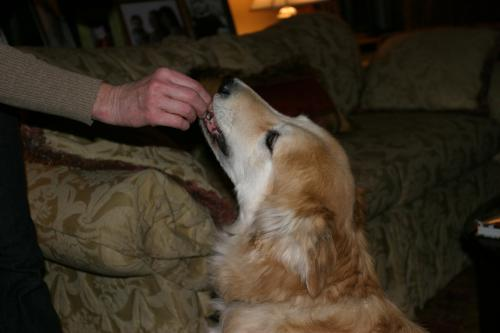

In [39]:
PIL.Image.open(str(dogs[2]))

In [40]:
cats = list(data_dir.glob('Cat/*'))
cats[:5]

[PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/7981.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/6234.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/1269.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/3863.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/6241.jpg')]

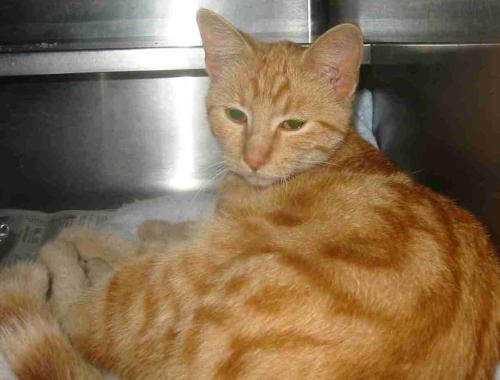

In [41]:
PIL.Image.open(str(cats[5]))

In [42]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

25000


In [43]:
pet_images_dict = {
    'cats': list(data_dir.glob('Cat/*')),
    'dogs': list(data_dir.glob('Dog/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [44]:
pet_images_dict['dogs'][:5]

[PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg')]

In [45]:
pet_images_dict['cats'][:5]

[PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/7981.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/6234.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/1269.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/3863.jpg'),
 PosixPath('../input/microsoft-catsvsdogs-dataset/PetImages/Cat/6241.jpg')]

In [46]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
X, Y = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(pet_labels_dict[pet_name])
        else:
            #print("Invalid Image")
            continue

cats


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


dogs


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [47]:
X = np.array(X)
Y = np.array(Y)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

18327 18327
6110 6110
(18327, 128, 128, 3) (18327,)
(6110, 128, 128, 3) (6110,)


In [49]:
IMAGE_CHANNELS=3
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
    
Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
    
Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.5),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 61, 61, 64)       

In [50]:
history=model.fit(X_train, Y_train, epochs=40)

Epoch 1/40


2023-12-06 10:58:42.047394: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


573/573 [==============================] - 22s 32ms/step - loss: 0.7162 - accuracy: 0.6478
Epoch 2/40
573/573 [==============================] - 18s 31ms/step - loss: 0.5117 - accuracy: 0.7506
Epoch 3/40
573/573 [==============================] - 18s 31ms/step - loss: 0.4451 - accuracy: 0.7955
Epoch 4/40
573/573 [==============================] - 18s 31ms/step - loss: 0.4005 - accuracy: 0.8187
Epoch 5/40
573/573 [==============================] - 18s 31ms/step - loss: 0.3664 - accuracy: 0.8356
Epoch 6/40
573/573 [==============================] - 18s 31ms/step - loss: 0.3378 - accuracy: 0.8546
Epoch 7/40
573/573 [==============================] - 18s 31ms/step - loss: 0.3037 - accuracy: 0.8706
Epoch 8/40
573/573 [==============================] - 18s 31ms/step - loss: 0.2805 - accuracy: 0.8801
Epoch 9/40
573/573 [==============================] - 18s 31ms/step - loss: 0.2713 - accuracy: 0.8858
Epoch 10/40
573/573 [==============================] - 18s 31ms/step - loss: 0.2450 - accurac

In [51]:
model.evaluate(X_test,Y_test)

191/191 [==============================] - 1s 7ms/step - loss: 0.1890 - accuracy: 0.9278


[0.18899251520633698, 0.9278232455253601]

In [52]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [0 if element < 0.5 else 1 for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

191/191 [==============================] - 1s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      3066
           1       0.90      0.96      0.93      3044

    accuracy                           0.93      6110
   macro avg       0.93      0.93      0.93      6110
weighted avg       0.93      0.93      0.93      6110



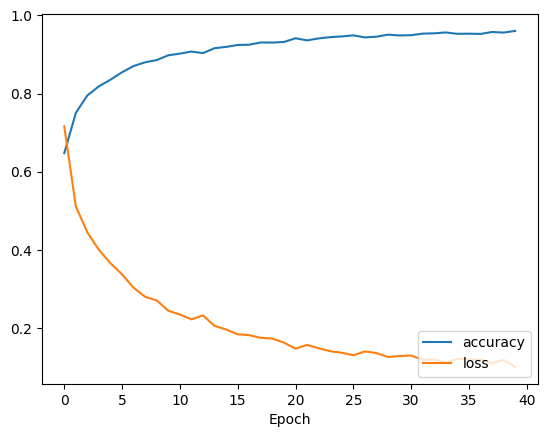

In [53]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 23ms/step
[[3.8826528e-07]]
class: 0 name= cat


/tmp/ipykernel_47/762426212.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open("../input/microsoft-catsvsdogs-dataset/PetImages/Cat/2484.jpg").convert("RGB").resize([IMAGE_WIDTH,IMAGE_HEIGHT],Image.ANTIALIAS)


(-0.5, 127.5, 127.5, -0.5)

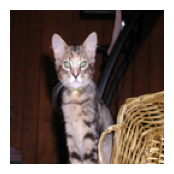

In [54]:
classes = ["cat","dog"]
from PIL import Image
fileImage = Image.open("../input/microsoft-catsvsdogs-dataset/PetImages/Cat/2484.jpg").convert("RGB").resize([IMAGE_WIDTH,IMAGE_HEIGHT],Image.ANTIALIAS)
image = np.array(fileImage)
myimage = image.reshape(1, IMAGE_WIDTH,IMAGE_HEIGHT,3)
# prepare pixel data
#myimage = myimage.astype('float32')
#myimage = myimage/255.
plt.figure(figsize = (4,2))
plt.imshow(image)

my_predicted_image = model.predict(myimage)
print(my_predicted_image)
if (my_predicted_image < 0.40):
    y_class=0 
else:
    y_class=1
print("class:",y_class,"name=",classes[y_class])
plt.axis('off')

In [55]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [56]:
model.save('model.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
